(10, 63)


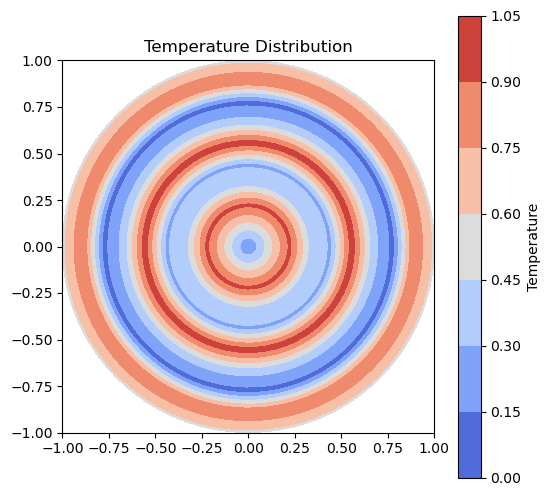

IntSlider(value=0, description='Time Step', max=62)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot2D_cell(T_cyl, n):
    """
    Function to plot 'n' static temperature contour plots of a full cylinder
    at 'n' equidistant time steps.

    Parameters:
    - T_cyl: np.ndarray of shape (N_radial, N_time)
    - n: int, number of plots to generate (must be <= N_time)
    """
    # Get the number of radial and time points
    N_radial, N_time = T_cyl.shape  

    # Ensure n does not exceed the number of available time steps
    if n > N_time:
        raise ValueError("n cannot be greater than the number of time steps in T_cyl.")

    # Define radial and angular grids
    r = np.linspace(0, 1, N_radial)  # Radial positions
    theta = np.linspace(0, 2 * np.pi, 100)  # Full circle (100 angular points)
    R, Theta = np.meshgrid(r, theta, indexing='ij')

    # Convert to Cartesian coordinates for plotting
    X = R * np.cos(Theta)
    Y = R * np.sin(Theta)

    # Select n time steps at equal intervals
    time_steps = np.linspace(0, N_time - 1, n, dtype=int)

    # Create figure with 'n' subplots
    fig, axes = plt.subplots(1, n, figsize=(5 * n, 5))  # Adjust figure size dynamically

    for i, t in enumerate(time_steps):
        # Generate temperature data for the current time step
        temperature_data = np.tile(T_cyl[:, t].reshape(N_radial, 1), (1, 100))

        # Get min and max for this specific time step
        T_min, T_max = np.min(T_cyl[:, t]), np.max(T_cyl[:, t])

        # Avoid ValueError by ensuring levels are strictly increasing
        if T_min == T_max:
            T_max += 1e-6  # Small numerical adjustment

        # Create contour plot with dynamically scaled color mapping
        contour = axes[i].contourf(X, Y, temperature_data, cmap='coolwarm', levels=np.linspace(T_min, T_max, 100))

        # Formatting
        axes[i].set_xlim(-1, 1)
        axes[i].set_ylim(-1, 1)
        axes[i].set_aspect('equal')
        axes[i].set_title(f"Time Step {t}")

        # Add colorbar for each subplot
        cbar = plt.colorbar(contour, ax=axes[i])
        cbar.set_label("Temperature")

    plt.tight_layout()
    plt.show()